#### Creating Different Data plots

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
#let's Download some built-in datasets of the seaborn library
penguins = sns.load_dataset('penguins')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
car_crashes = sns.load_dataset('car_crashes')
fmri = sns.load_dataset('fmri')
diamonds = sns.load_dataset('diamonds')

<b>Bar Chart</b>
<br>A very common visualization for displaying the numerical values of categorical data to compare various categrories betweeen them

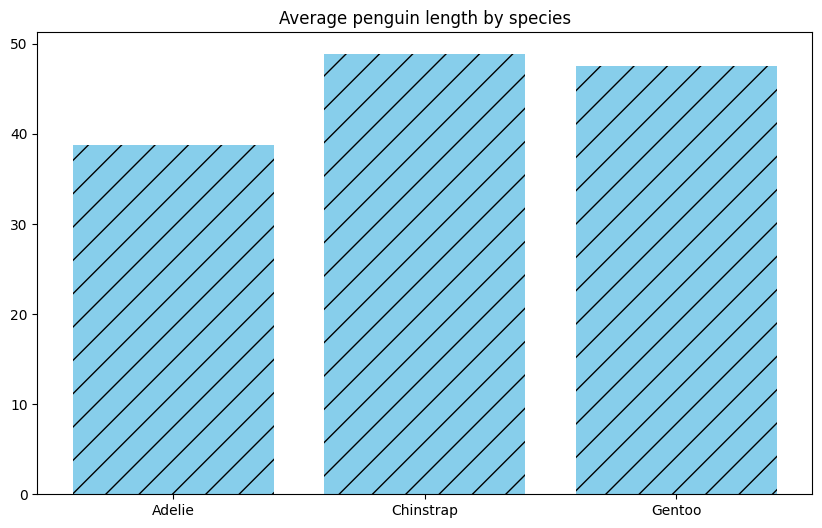

In [13]:
''' 
    Let's create a plot to show the average bill length of different species of the penguins
'''
penguins_grouped = penguins[['species','bill_length_mm']].groupby('species').mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(penguins_grouped['species'],penguins_grouped['bill_length_mm'],color='skyblue',hatch='/')
plt.title('Average penguin length by species')
plt.show()

<b>A Line Plot</b>
<br>it is type of data chart that shows a progression of a variable from left to right along the x-axis through data points connected by straight line.
<br>The change of a variable is plotted over time.
<br>Line plots are often used for visualizing time series.

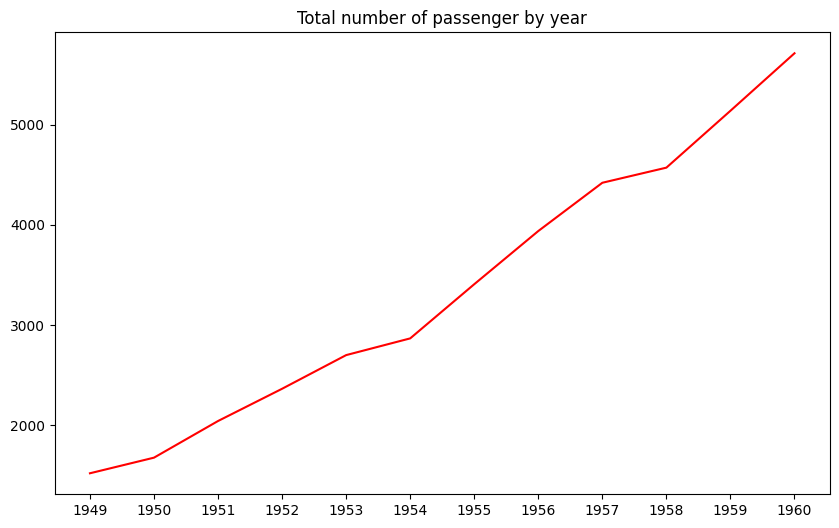

In [14]:
#lets plot a line chart to show the total number of passengers by Year
flights_grouped_by_year = flights[['year','passengers']].astype({'year':'string'}).groupby('year').sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(flights_grouped_by_year['year'],flights_grouped_by_year['passengers'],color='red')
plt.title('Total number of passenger by year')
plt.show()


<b>Scatter Plot</b>
<br> It is a data visualization type that displays the relationships between two variables plotted as data points on the co-ordinate plane.
<br>It checks if the two variable correlate among themselves, how strong this correlation is, and if there are distinct clusters in the data.


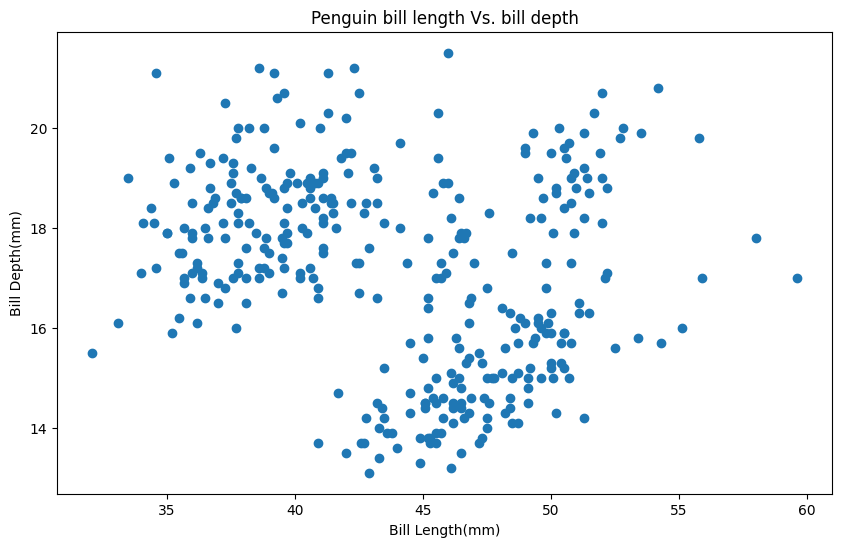

In [15]:
#lets see how bill length is associated with bill depth
plt.figure(figsize=(10,6))
plt.scatter(penguins['bill_length_mm'],penguins['bill_depth_mm'])
plt.title('Penguin bill length Vs. bill depth')
plt.xlabel('Bill Length(mm)')
plt.ylabel('Bill Depth(mm)')
plt.show()

<b>Histogram</b>
<br>A histogram is a type of data plot that represents the frequnecy distribution of the values of a numerical variable.
<br> It splits the data into value range groups called bins. Display each bin as a vertical bar, with the height proportional to the count value for that bin. 

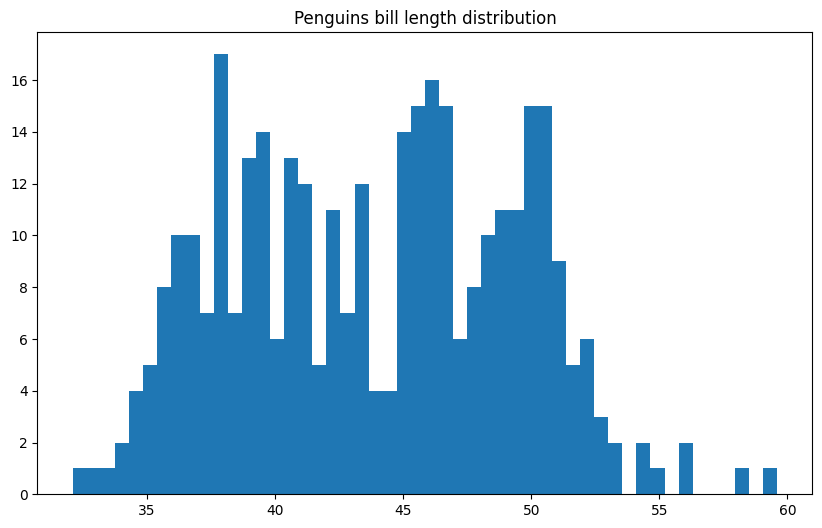

In [16]:
plt.figure(figsize=(10,6))
plt.hist(penguins['bill_length_mm'],bins=50)
plt.title('Penguins bill length distribution')
plt.show()

<b>Box Plot</b>
<br>A box plot is a data plot type that shows a set of five descriptive statistics: <br>
<li>the data: the minimum and maximum values(Excluding the outliers)</li>
<li>the median</li>
<li>the first and third quartiles</li>


In [17]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [18]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


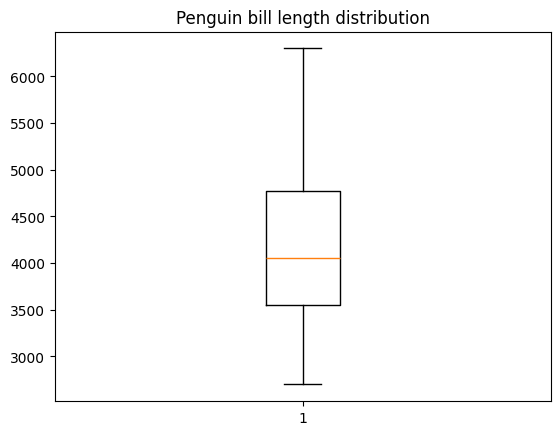

In [19]:
#the dataset contains null vallues let's drop all the null values
penguins.dropna(inplace=True)

plt.boxplot(penguins['body_mass_g'])
plt.title('Penguin bill length distribution')
plt.show()

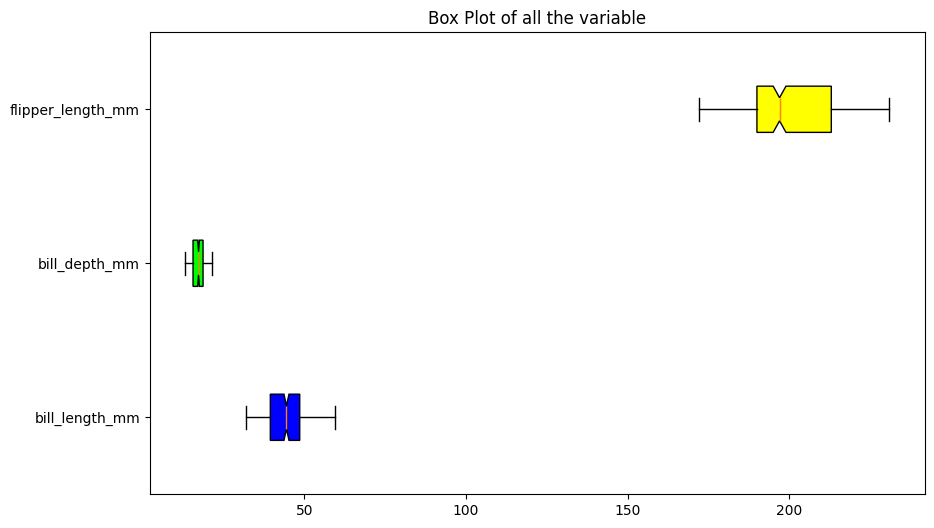

In [20]:
columns = penguins.select_dtypes(exclude=['object']).columns.to_list() 
columns.pop()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

bp = ax.boxplot(penguins.select_dtypes(exclude='object').drop(['body_mass_g'],axis=1),patch_artist=True,notch='Ture',vert=0)
colors = ['#0000FF', '#00FF00', 
          '#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'],colors):
    patch.set_facecolor(color)

ax.set_yticklabels(columns)
plt.title('Box Plot of all the variable')
plt.show()

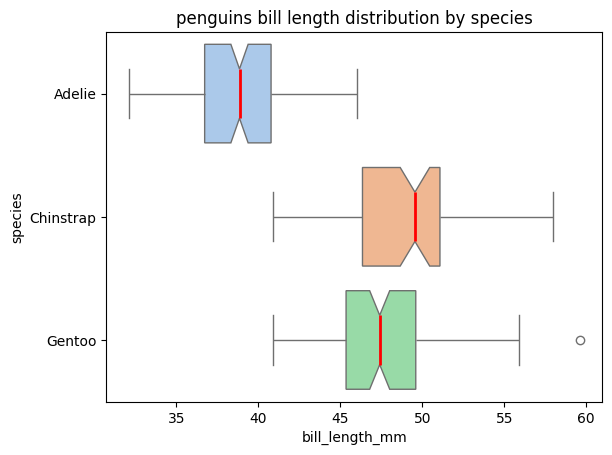

In [42]:
#multiple box plot 
''' 
for example: we want to display and compare these statistics separately
seperately for each category of a categorical variable.
We can easily do with the seaborn.boxplot()
'''
sns.boxplot(data=penguins,x='bill_length_mm',
            y='species',palette='pastel',notch=True,medianprops={'color':'r','linewidth':2})
plt.title('penguins bill length distribution by species')
plt.show()

In [21]:
penguins.select_dtypes(exclude='object')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


<b>Pie chart</b>
<br>A type of visualization repersented by a circle divided into sectors, where each sector corresponds a certain catergory of the categroical data, and the angle of each sector reflects the porportion of that category as a part of the whole.
<br>pie charts should be used sparingly and with caution

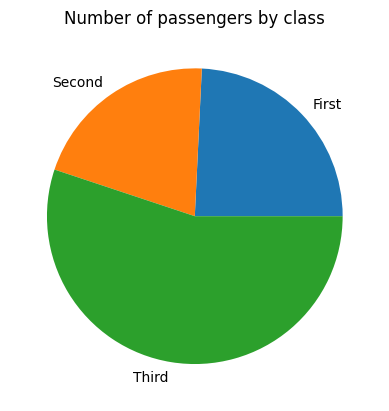

In [22]:
pclass_group  = titanic.groupby('class')['pclass'].count().reset_index()

plt.pie(pclass_group['pclass'],labels=pclass_group['class'])
plt.title('Number of passengers by class')
plt.show()

#### Some Advanced data plots

<b>Grouped bar chart</b>
<br>A grouped bar chart serves the same purpose for more than two categorical variables. 

<b>Seaborn Library offers a more convienent functionality. We will get deep dive into more in a while</b>

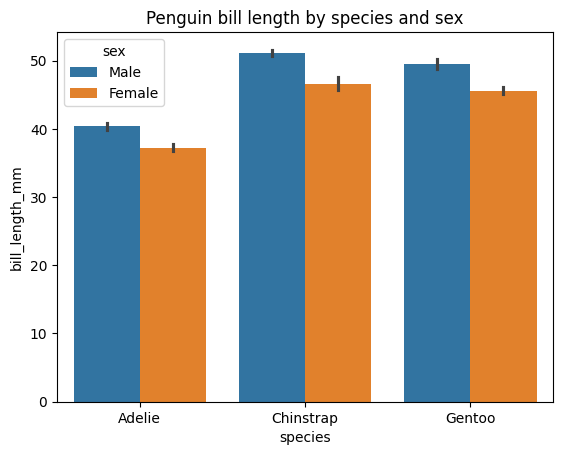

In [23]:
sns.barplot(data=penguins,x='species',y='bill_length_mm',hue='sex')
plt.title('Penguin bill length by species and sex')
plt.show()

<b>Stacked area chart</b><br>
It is an extension of a common area chart(which is simply a line plot with the area below the line colored or filled with a pattern) with multiple areas.
<br>like line plots, stacked area charts usually reflect the change of variables over time.

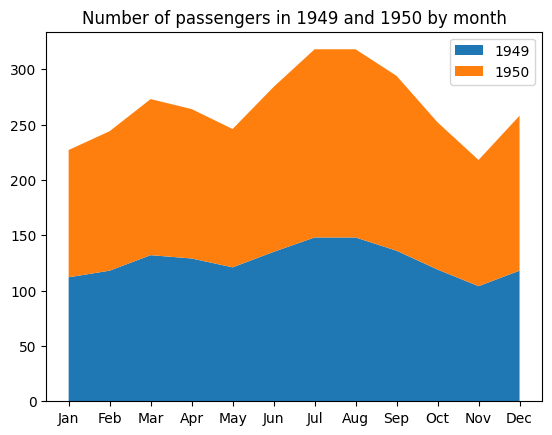

In [35]:
# Data preparation
flights_grouped = flights.groupby(['year', 'month']).mean().reset_index()
flights_49_50 = pd.DataFrame(list(zip(flights_grouped.loc[:11, 'month'].tolist(), flights_grouped.loc[:11, 'passengers'].tolist(), flights_grouped.loc[12:23, 'passengers'].tolist())), columns=['month', '1949', '1950'])

# Creating a stacked area chart
plt.stackplot(flights_49_50['month'], flights_49_50['1949'], flights_49_50['1950'], labels=['1949', '1950'])
plt.title('Number of passengers in 1949 and 1950 by month')
plt.legend()
plt.show()

In [29]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
